In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

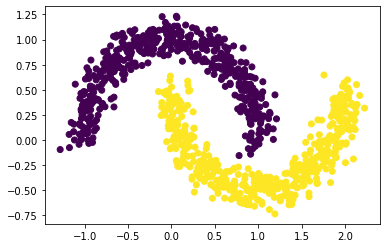

In [2]:
X, y = make_moons(n_samples=1000, random_state=43, noise=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y)

In [3]:
X, X_test, y, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
y = y.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
X = torch.Tensor(X)
y = torch.Tensor(y)
X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test)

## Linear Classifier

In [4]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_size):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_size, 1)
    
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred
        

In [5]:
model = LogisticRegression(input_size=2)
loss_fn = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [6]:
prev_loss = 0
for epoch in range(10000):
    model.train() # Set the model to training mode
    y_pred = model(X) # Evaluate the model on the training data
    loss = loss_fn(y_pred, y) # Calculate the loss

    # Early stopping 
    if (abs(loss.item() - prev_loss)) < 1e-6:
        print(f"Converged after {epoch} epochs")
        break
    # print("Model params: ", model.state_dict())
    optimizer.zero_grad() # Reset the gradients for optimizer
    loss.backward() # Calculate the gradients for loss_fn wrt model parameters
    optimizer.step() # Update the model parameters

    model.eval() # Set the model to evaluation mode
    y_pred_test = model(X_test) # Evaluate the model on the test data
    loss_test = loss_fn(y_pred_test, y_test) # Calculate the loss


    
    prev_loss = loss.item()
    if epoch % 1000 == 0:
        print(f"Epoch: {epoch}, loss: {loss.item()}, loss_test: {loss_test.item()}")

Epoch: 0, loss: 0.6448249220848083, loss_test: 0.6358745694160461
Epoch: 1000, loss: 0.38297969102859497, loss_test: 0.3678303062915802
Epoch: 2000, loss: 0.3307397961616516, loss_test: 0.3183329105377197
Epoch: 3000, loss: 0.3067600727081299, loss_test: 0.29691532254219055
Epoch: 4000, loss: 0.292265385389328, loss_test: 0.28459474444389343
Epoch: 5000, loss: 0.2824382185935974, loss_test: 0.27659499645233154
Epoch: 6000, loss: 0.2753736078739166, loss_test: 0.2710631191730499
Epoch: 7000, loss: 0.2701094150543213, loss_test: 0.26708486676216125
Epoch: 8000, loss: 0.2660858631134033, loss_test: 0.2641434073448181
Epoch: 9000, loss: 0.26294928789138794, loss_test: 0.26192179322242737


In [15]:
model.eval()
pred = model(X_test)
print("Accuracy: ",(np.round(pred.detach().numpy()) == y_test.detach().numpy()).sum() / y_test.shape[0])

Accuracy:  0.9


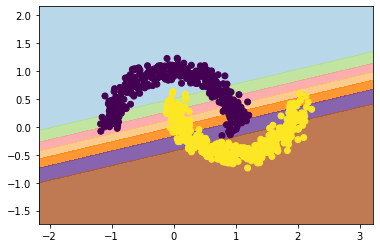

In [8]:
# Plot the decision boundary
x_min, x_max = X[:, 0].detach().numpy().min() - 1, X[:, 0].detach().numpy().max() + 1
y_min, y_max = X[:, 1].detach().numpy().min() - 1, X[:, 1].detach().numpy().max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                        np.arange(y_min, y_max, 0.1))
grid = torch.cat((torch.Tensor(xx.reshape(-1, 1)), torch.Tensor(yy.reshape(-1, 1))), 1)
grid = grid.type(torch.FloatTensor)
pred_grid = model(grid).detach().numpy()
pred_grid = pred_grid.reshape(xx.shape)
plt.contourf(xx, yy, pred_grid, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y.detach().numpy())
plt.show()

## Non Linear Classification

In [9]:
class NonLinearClassifier(torch.nn.Module):
    def __init__(self, input_size):
        super(NonLinearClassifier, self).__init__()
        self.layer_1 = torch.nn.Linear(input_size, 100)
        self.layer_2 = torch.nn.Linear(100, 1)
        self.leaky_relu = torch.nn.LeakyReLU()
        self.dropout = torch.nn.Dropout(p=0.2)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.layer_1(x)
        x = self.leaky_relu(x)
        x = self.dropout(x)
        x = self.layer_2(x)
        return self.sigmoid(x)

In [10]:
non_linear_model = NonLinearClassifier(input_size=2)
loss_fn = torch.nn.BCELoss()
optimizer = torch.optim.SGD(non_linear_model.parameters(), lr=0.01)

In [11]:
prev_loss = 0
for epoch in range(10000):
    non_linear_model.train() # Set the model to training mode
    y_pred = non_linear_model(X) # Evaluate the model on the training data
    loss = loss_fn(y_pred, y) # Calculate the loss

    # Early stopping
    # if (abs(loss.item() - prev_loss)) < 1e-6:
    #     print(f"Converged after {epoch} epochs")
    #     break
    # print("Model params: ", model.state_dict())
    optimizer.zero_grad() # Reset the gradients for optimizer
    loss.backward() # Calculate the gradients for loss_fn wrt model parameters
    optimizer.step() # Update the model parameters

    non_linear_model.eval() # Set the model to evaluation mode
    y_pred_test = non_linear_model(X_test) # Evaluate the model on the test data
    loss_test = loss_fn(y_pred_test, y_test) # Calculate the loss

    prev_loss = loss.item()
    if epoch % 1000 == 0:
        print(f"Epoch: {epoch}, loss: {loss.item()}, loss_test: {loss_test.item()}")

        

Epoch: 0, loss: 0.6131902933120728, loss_test: 0.601893424987793
Epoch: 1000, loss: 0.2590326964855194, loss_test: 0.2511257529258728
Epoch: 2000, loss: 0.23482978343963623, loss_test: 0.22642113268375397
Epoch: 3000, loss: 0.2209952175617218, loss_test: 0.20814257860183716
Epoch: 4000, loss: 0.2041710615158081, loss_test: 0.19075371325016022
Epoch: 5000, loss: 0.18538746237754822, loss_test: 0.1735430359840393
Epoch: 6000, loss: 0.16838708519935608, loss_test: 0.15731468796730042
Epoch: 7000, loss: 0.155666783452034, loss_test: 0.1421080231666565
Epoch: 8000, loss: 0.1340731531381607, loss_test: 0.1278141736984253
Epoch: 9000, loss: 0.12738247215747833, loss_test: 0.11505064368247986


In [14]:
model.eval()
pred = non_linear_model(X_test)
print("Accuracy: ",(np.round(pred.detach().numpy()) == y_test.detach().numpy()).sum() / y_test.shape[0])

Accuracy:  0.9633333333333334


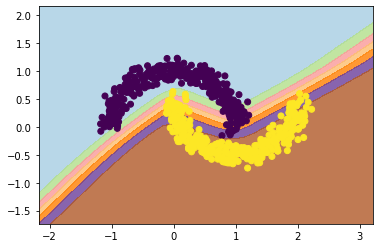

In [13]:
# Plot the decision boundary
x_min, x_max = X[:, 0].detach().numpy().min() - 1, X[:, 0].detach().numpy().max() + 1
y_min, y_max = X[:, 1].detach().numpy().min() - 1, X[:, 1].detach().numpy().max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                        np.arange(y_min, y_max, 0.1))
grid = torch.cat((torch.Tensor(xx.reshape(-1, 1)), torch.Tensor(yy.reshape(-1, 1))), 1)
grid = grid.type(torch.FloatTensor)
pred_grid = non_linear_model(grid).detach().numpy()
pred_grid = pred_grid.reshape(xx.shape)
plt.contourf(xx, yy, pred_grid, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y.detach().numpy())
plt.show()